In [5]:
!pip install keras --upgrade
!uninstall ngdlm
!pip install git+https://github.com/AI-Guru/ngdlm.git

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.2.4)
/bin/bash: uninstall: command not found
  Cloning https://github.com/AI-Guru/ngdlm.git to /tmp/pip-req-build-th3jyded
  Running setup.py bdist_wheel for ngdlm ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-1_k9flks/wheels/93/06/27/e156acb49f475c364c3c9fa4ad4ab7bfa38808bff5bf9c4647
Successfully built ngdlm


In [0]:
from keras import models, layers, optimizers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Parameters.
latent_dim = 100
input_shape = (28,28,1)

# Generator.
generator = models.Sequential()

generator.add(layers.Dense(256, input_dim = latent_dim))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))

generator.add(layers.Dense(512))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))

generator.add(layers.Dense(1024))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))

generator.add(layers.Dense(np.prod(input_shape), activation="tanh"))
generator.add(layers.Reshape(input_shape))
# Generator End.
              

pred = generator.predict(np.random.random((1, latent_dim)))[0]
pred.shape
              

# Discriminator.
discriminator = models.Sequential()
discriminator.add(layers.Flatten(input_shape = input_shape))
discriminator.add(layers.Dense(512))
discriminator.add(layers.LeakyReLU(alpha=0.2))
discriminator.add(layers.Dense(256))
discriminator.add(layers.LeakyReLU(alpha=0.2))
discriminator.add(layers.Dense(1, activation="sigmoid"))
discriminator.compile(
    optimizer=optimizers.Adam(0.0002, 0.5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [9]:
(x_input_train, _), (_, _) = mnist.load_data()
x_input_train = x_input_train / 127.5 - 1.0
x_input_train = np.expand_dims(x_input_train, axis = 3)
print(x_input_train.shape)


(60000, 28, 28, 1)


In [10]:
gan = ngdlmodels.GAN(generator, discriminator)
gan.compile(
    optimizer = optimizers.Adam(0.0002,0.5),
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)
gan.summary()

Generator:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              525312    

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


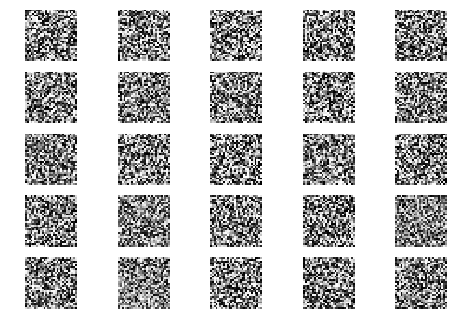

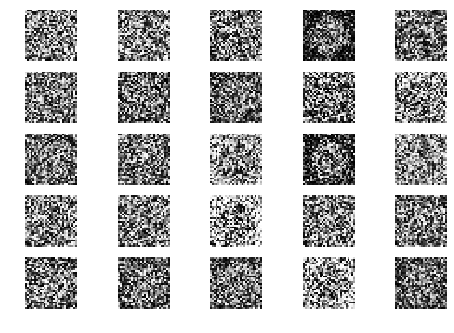

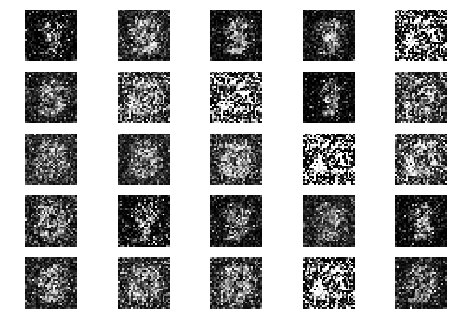

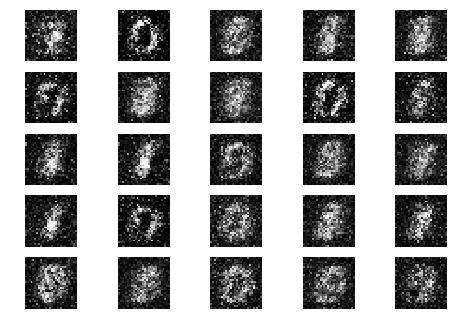

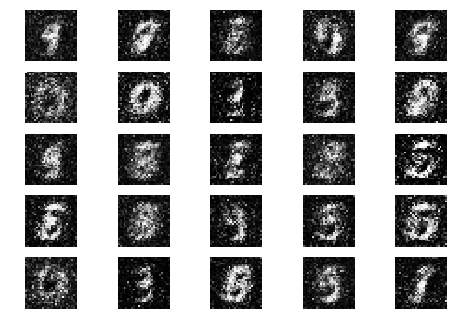

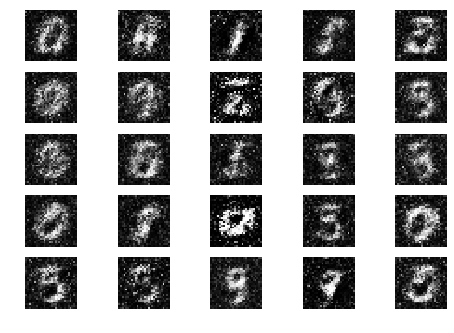

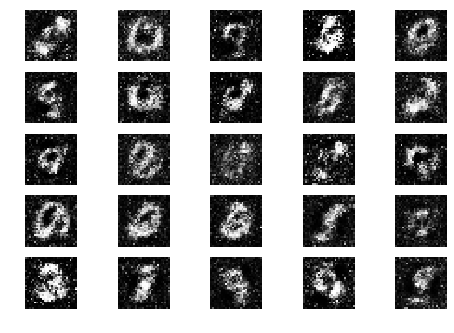

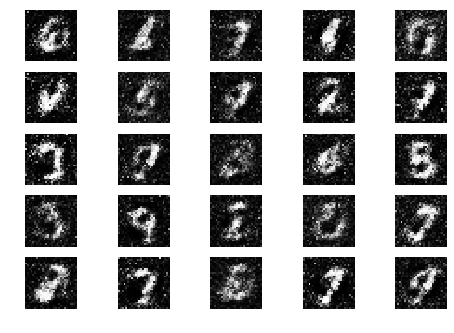

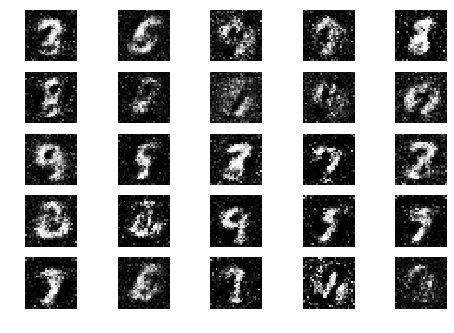

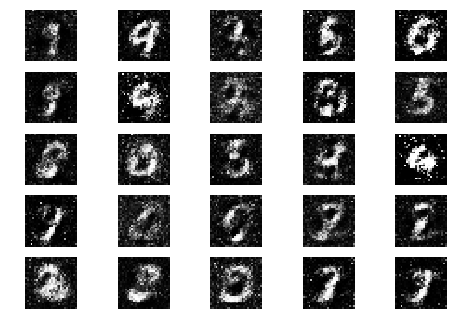

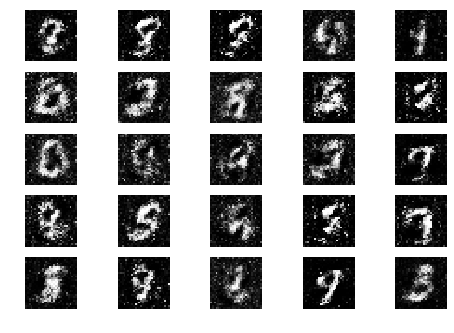

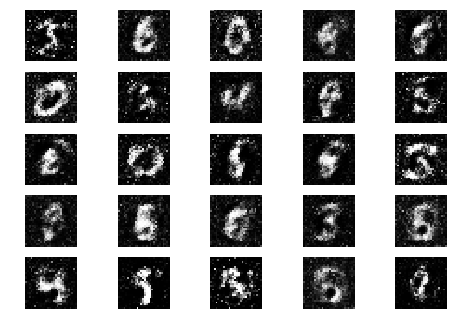

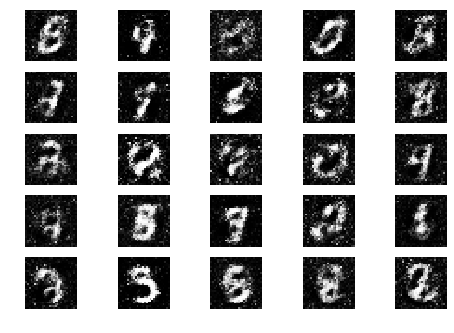

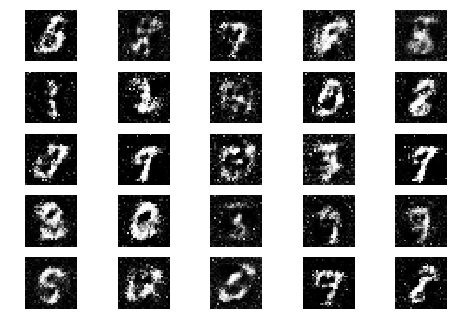

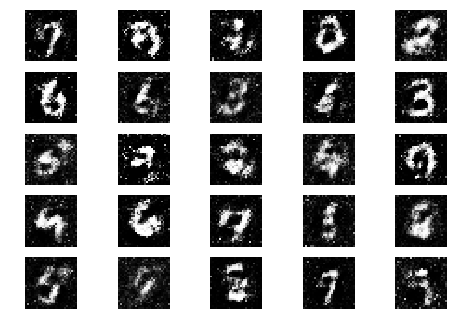

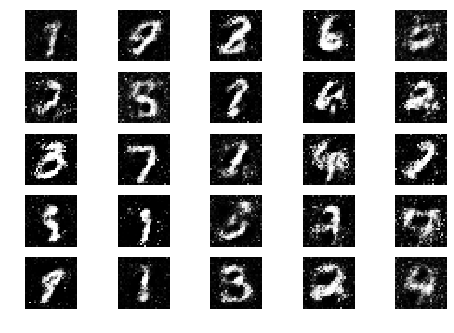

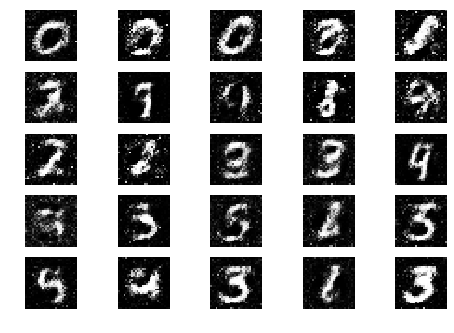

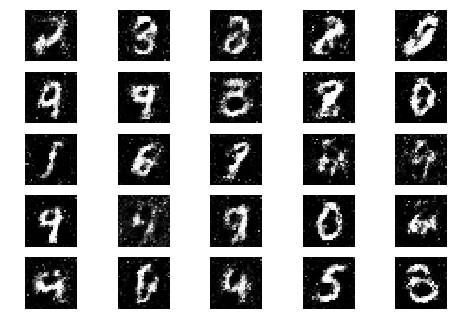

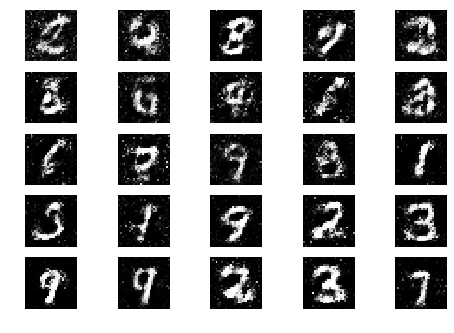

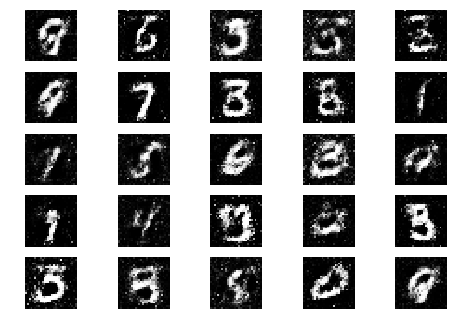

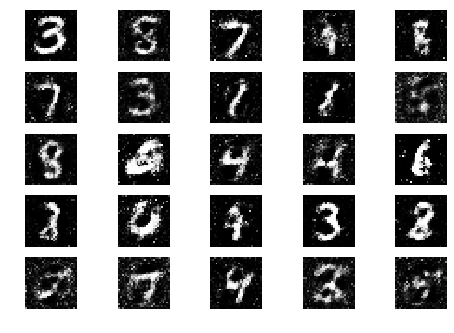

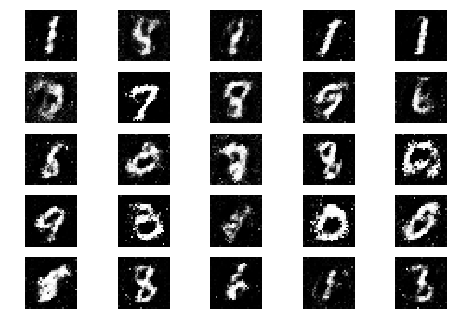

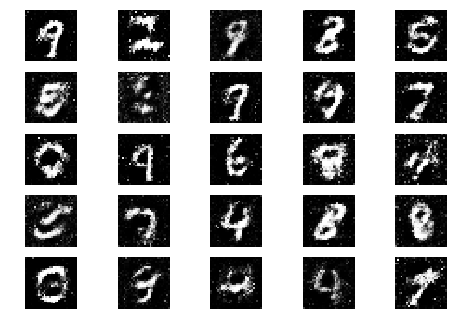

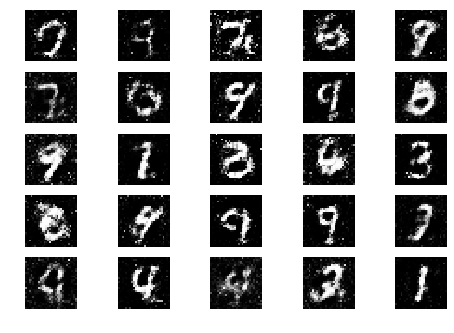

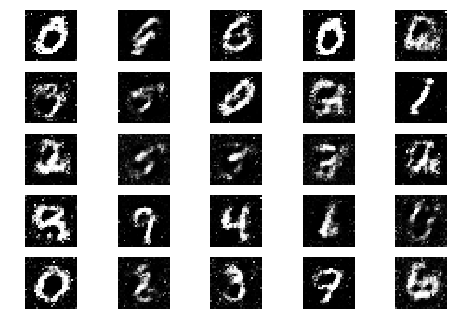

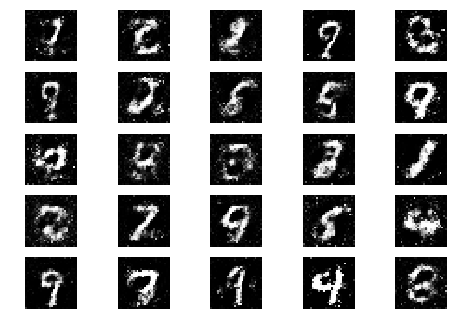

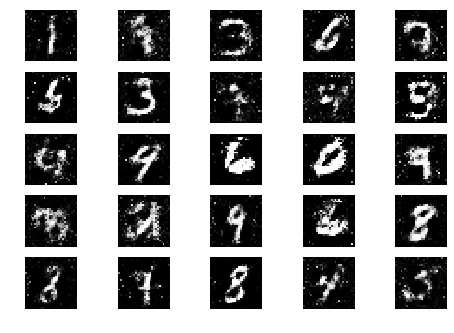

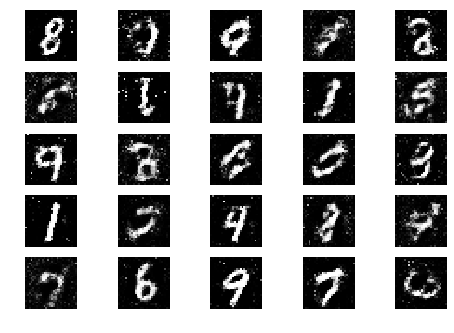

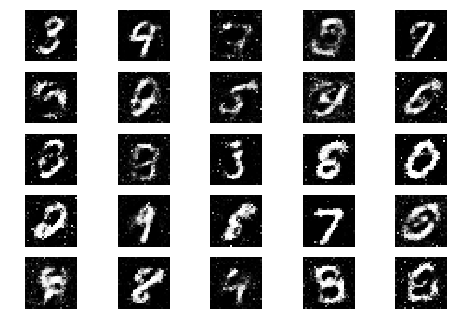

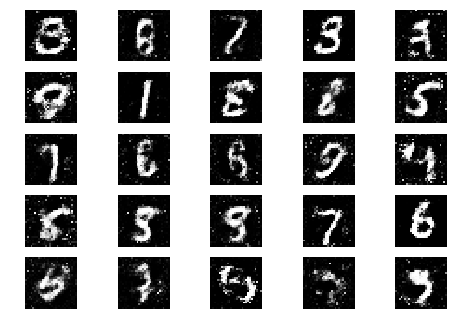

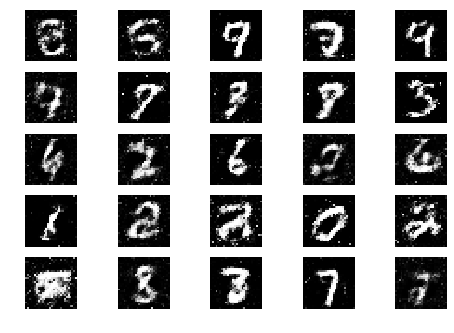

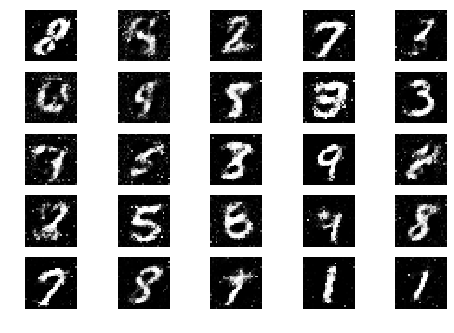

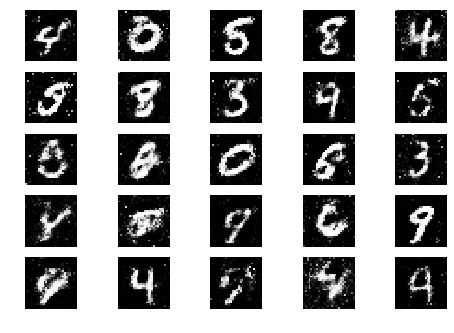

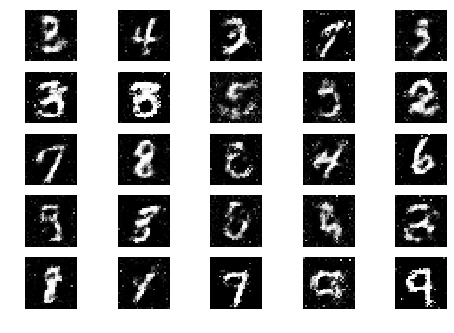

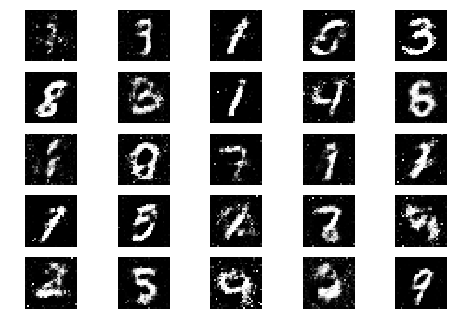

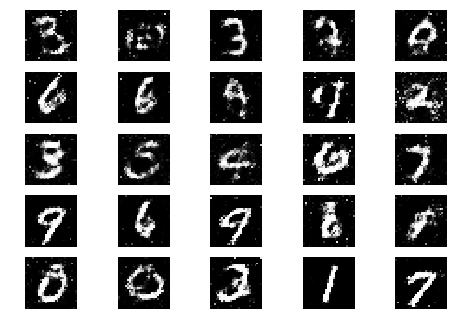

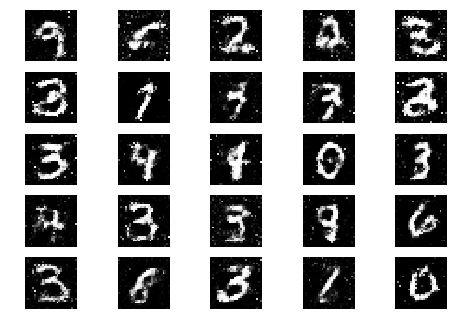

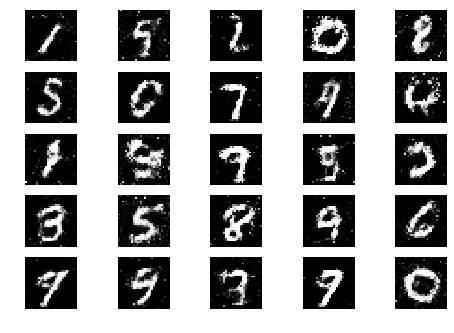

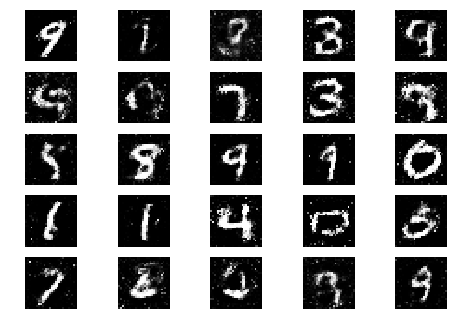

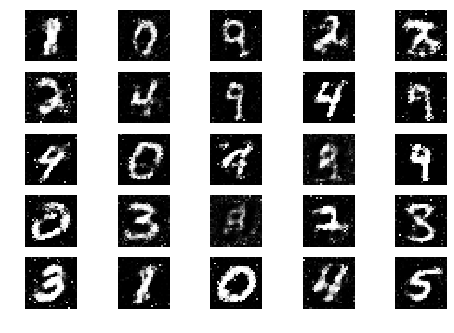

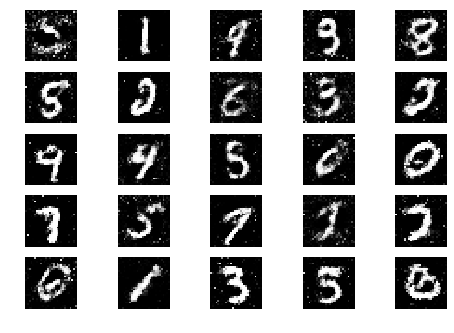

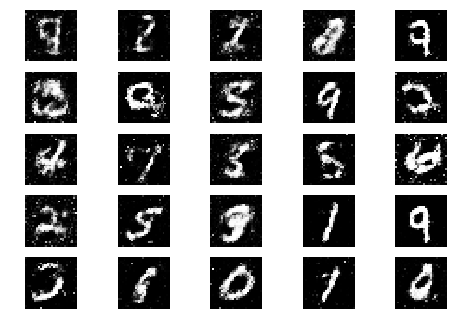

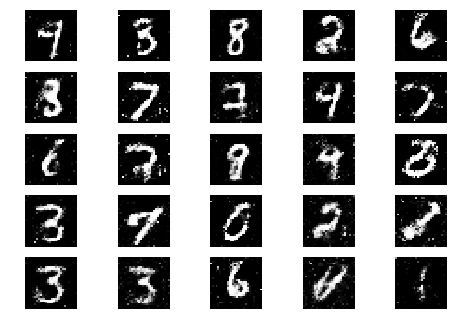

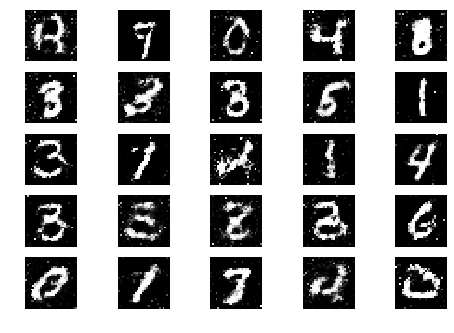

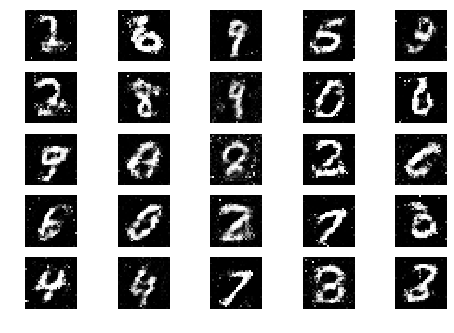

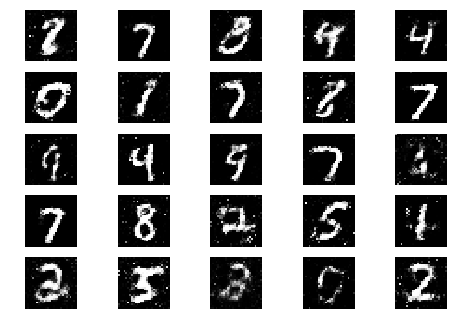

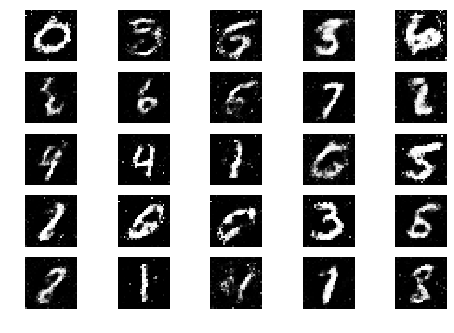

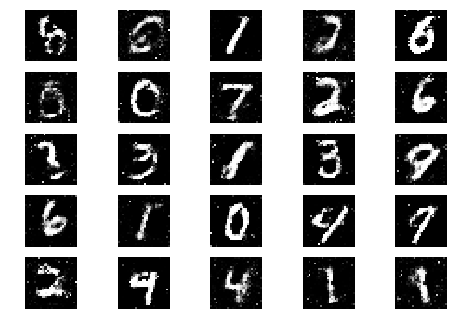

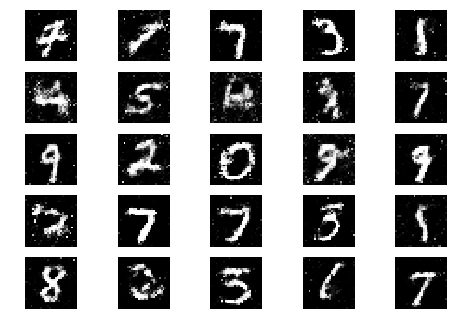

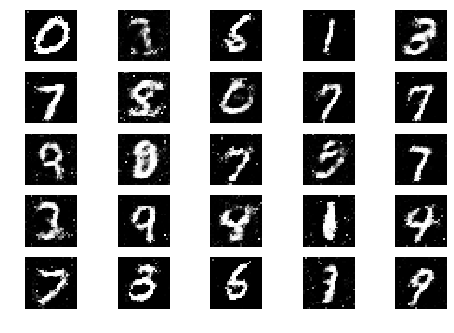

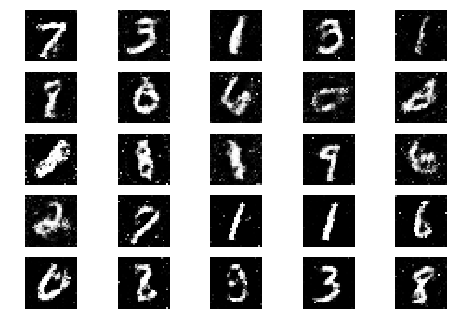

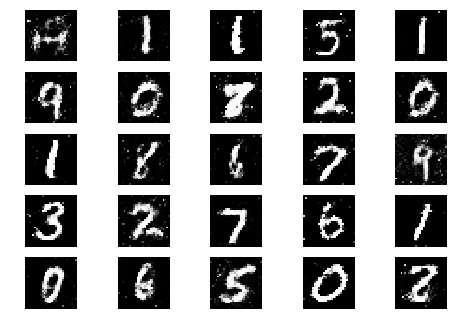

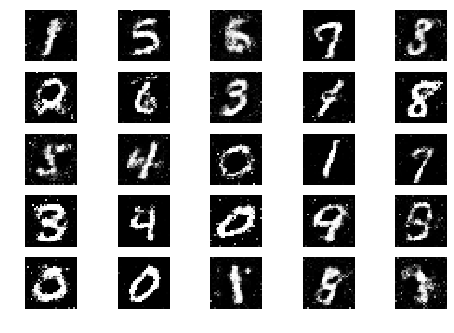

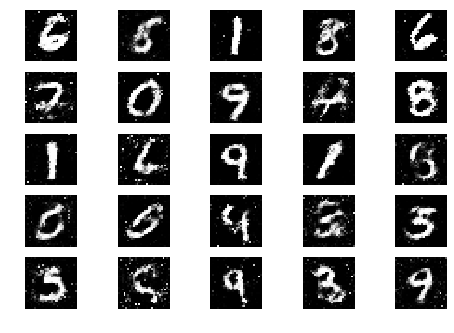

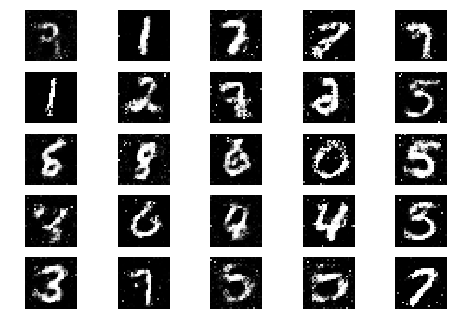

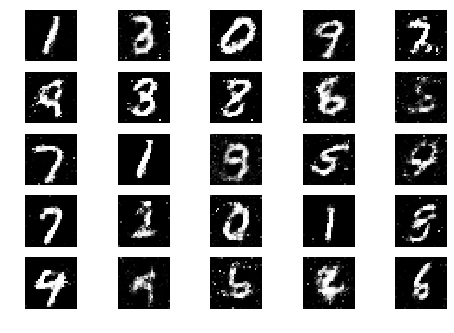

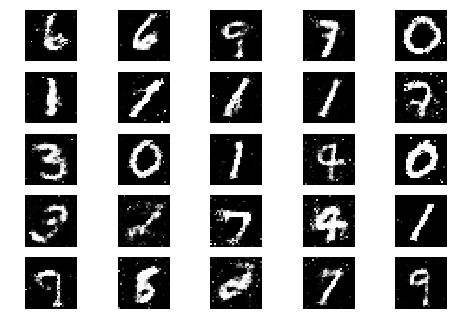

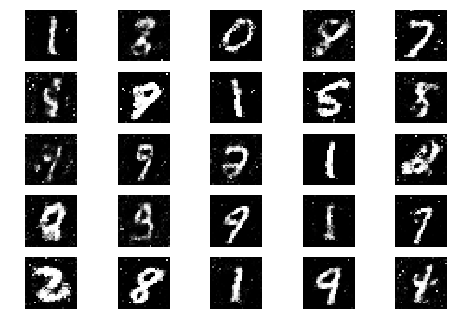

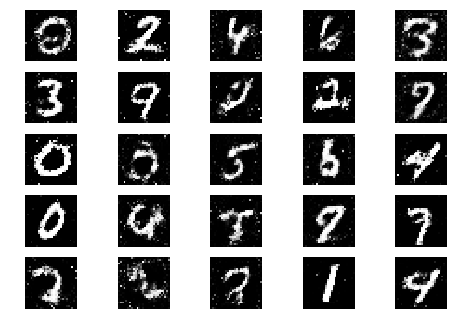

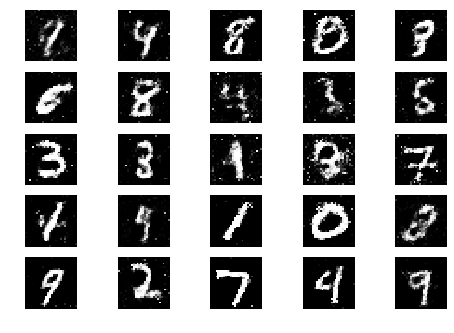

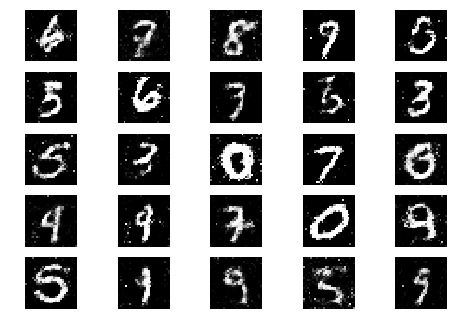

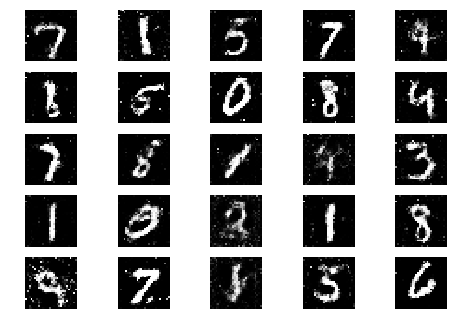

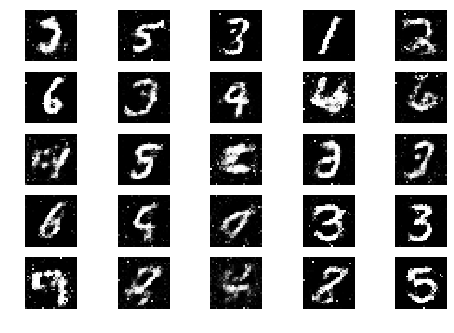

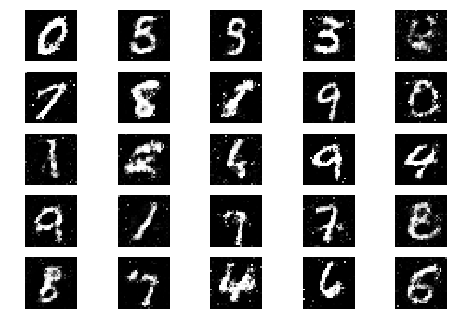

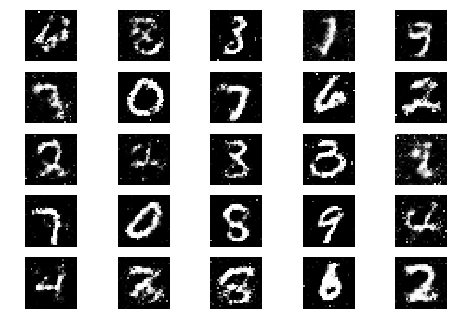

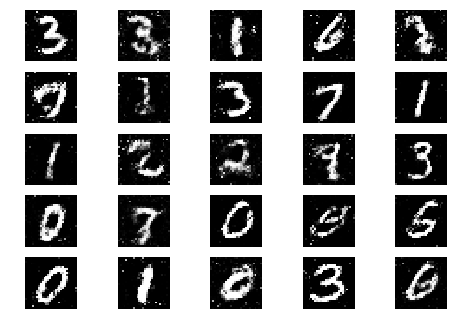

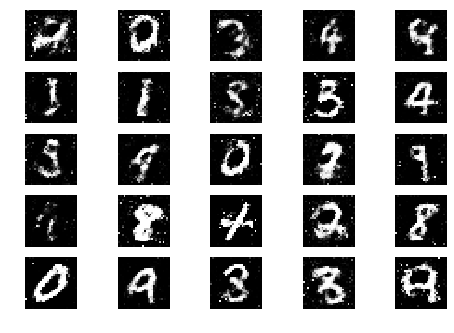

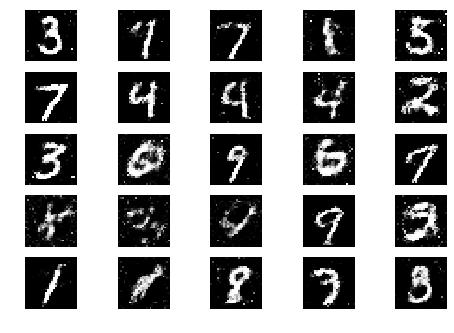

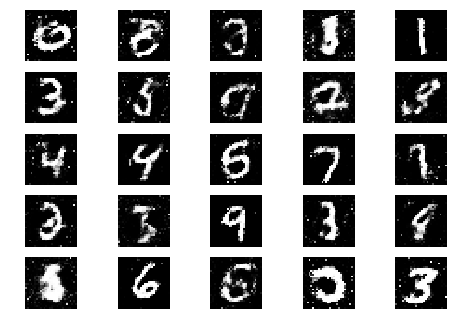

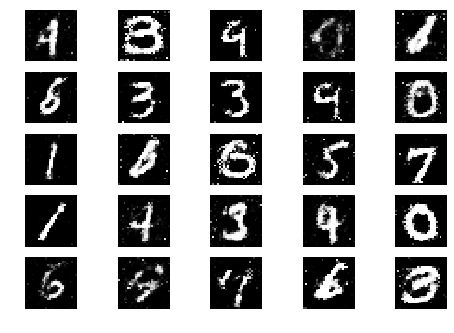

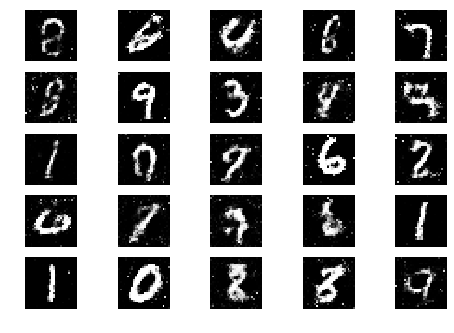

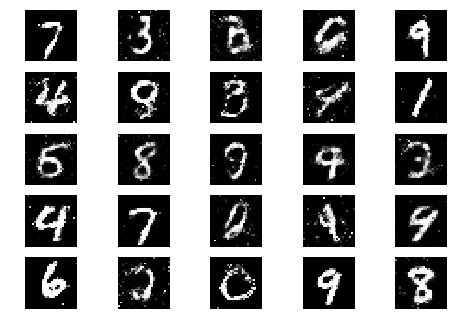

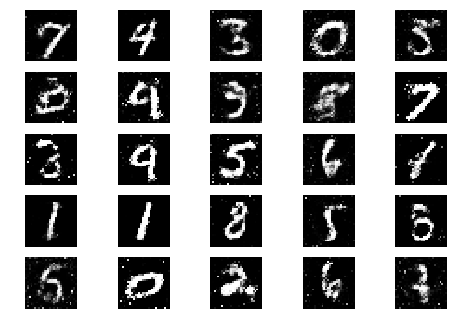

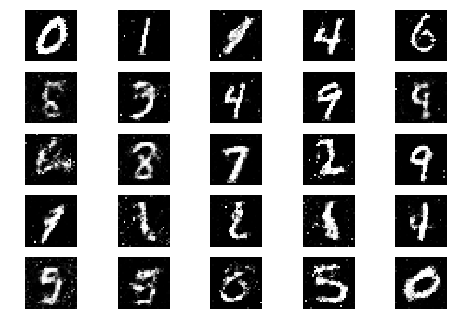

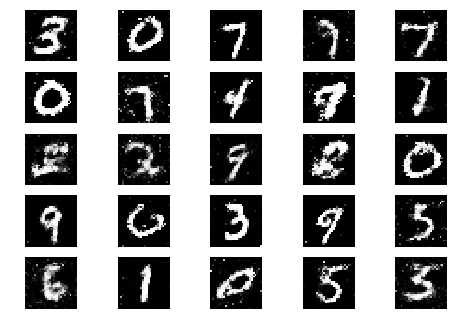

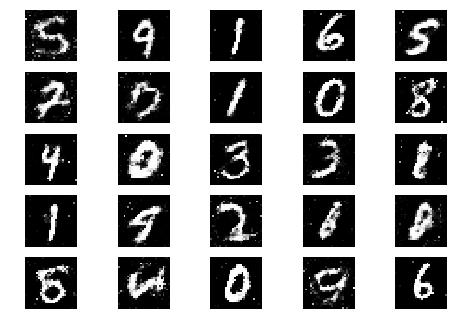

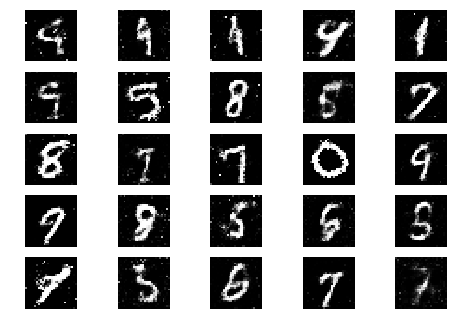

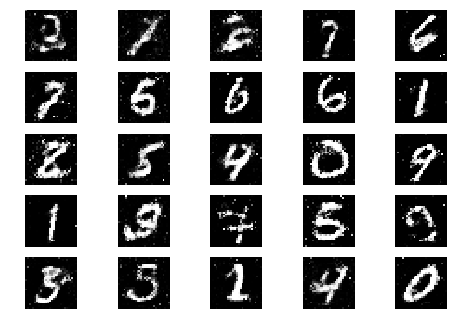

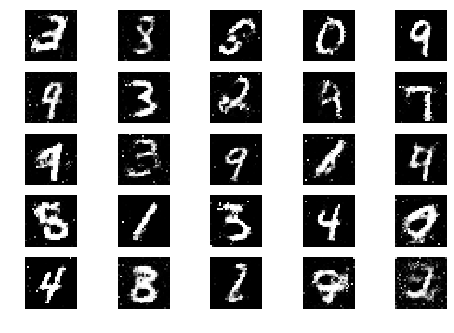

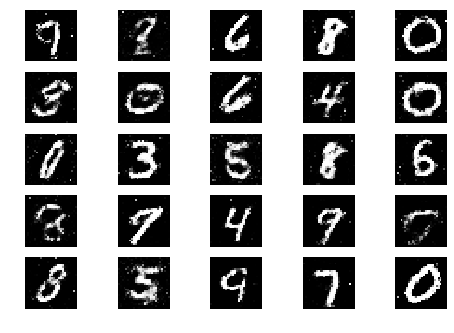

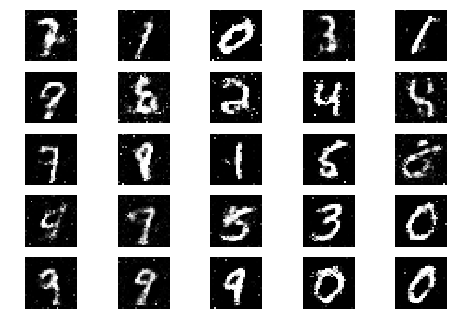

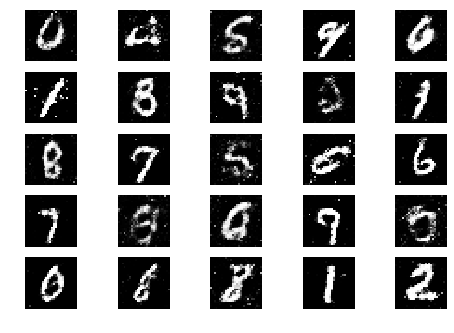

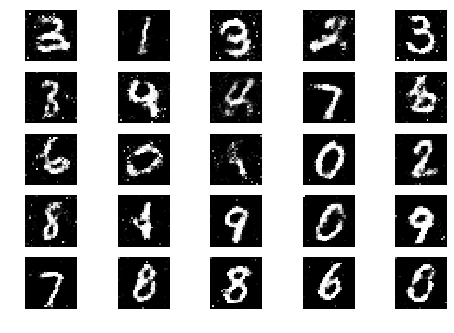

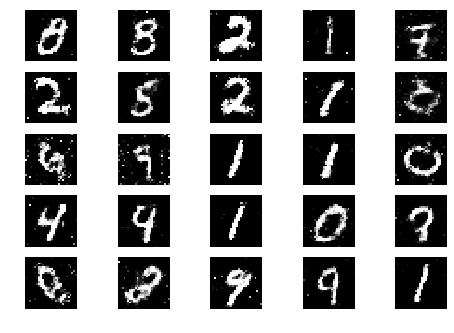

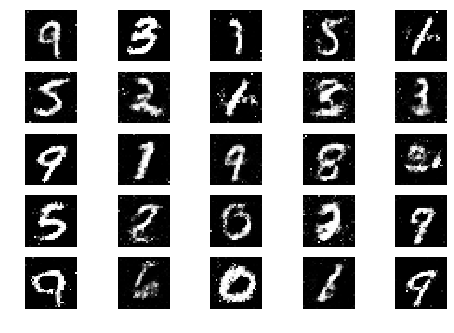

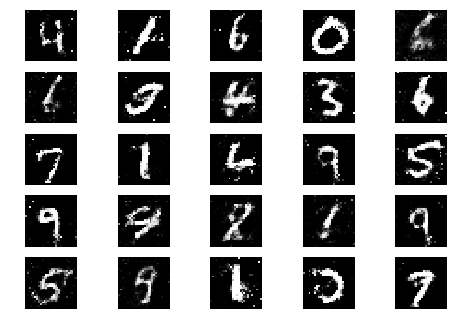

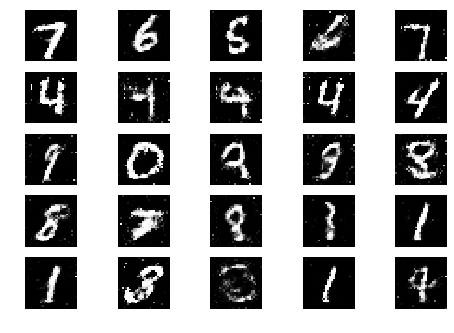

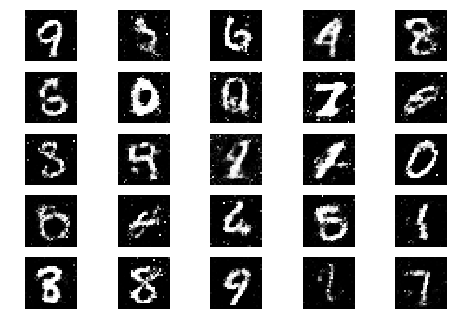

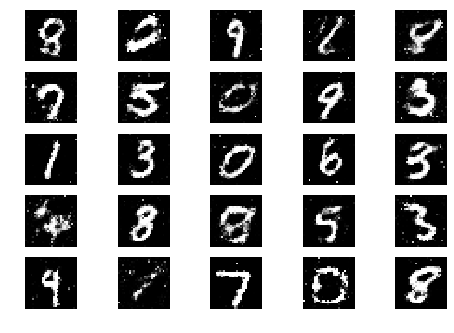

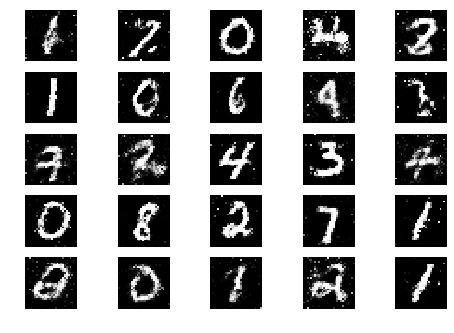

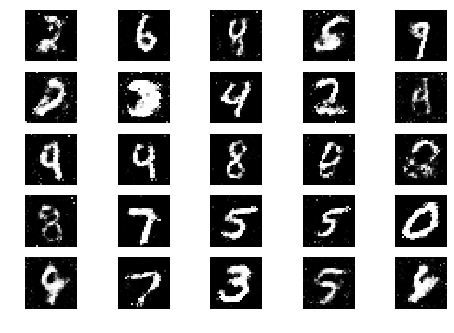

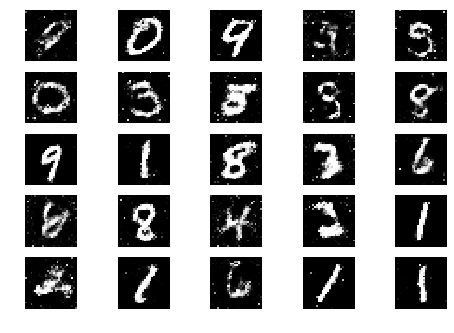

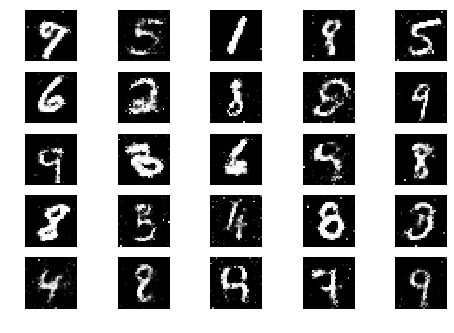

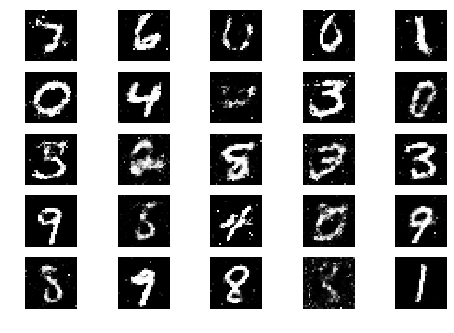

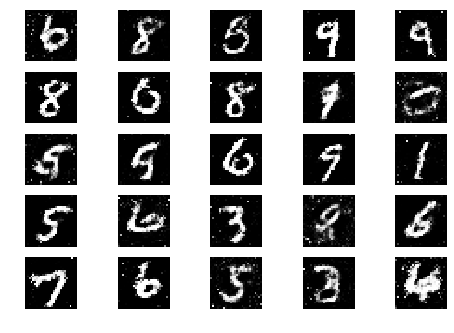

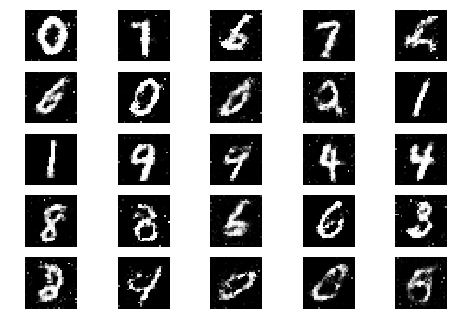

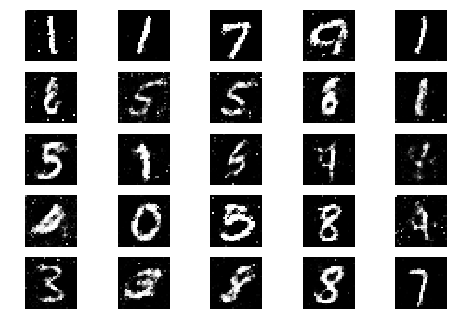

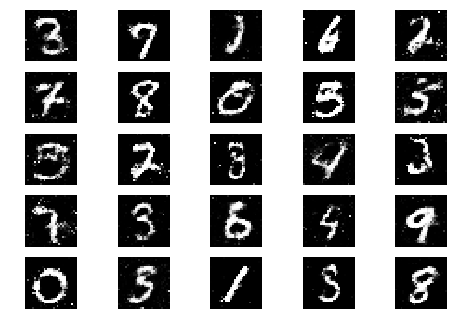

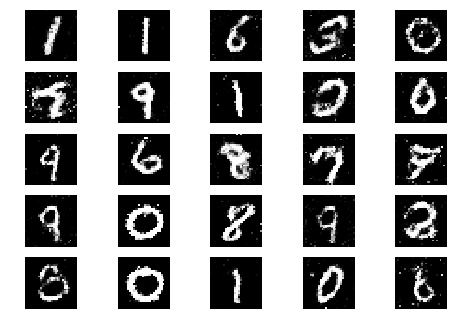

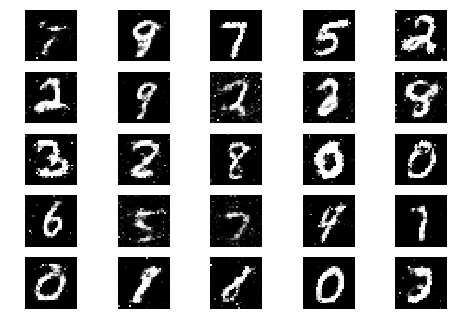

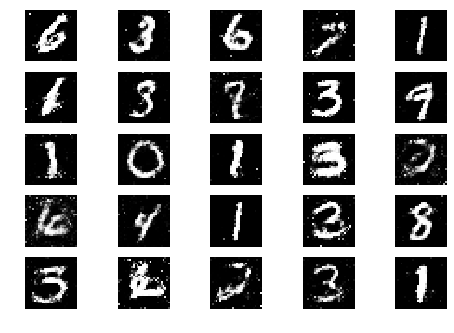

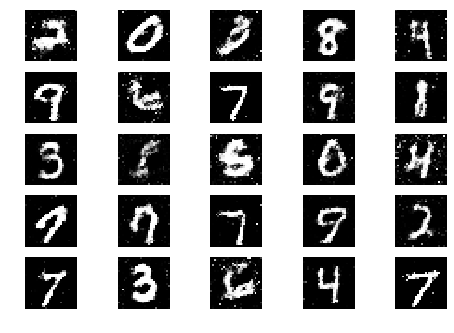

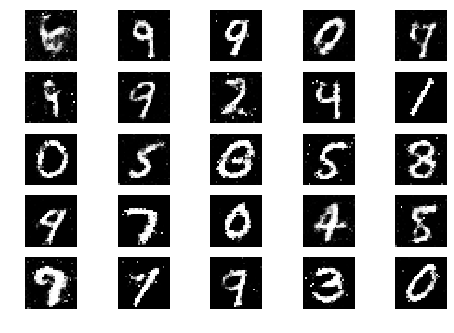

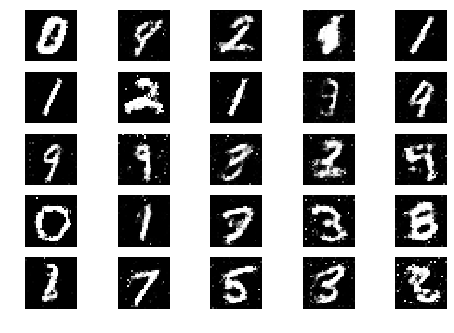

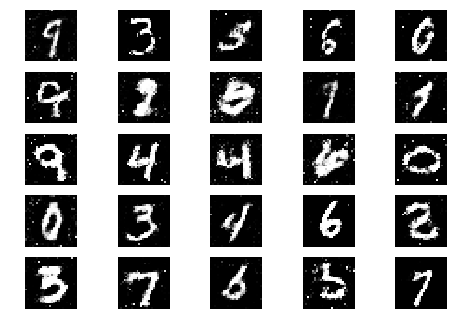

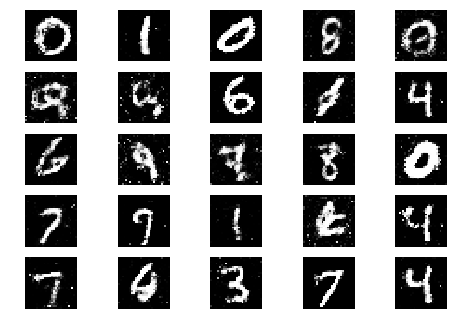

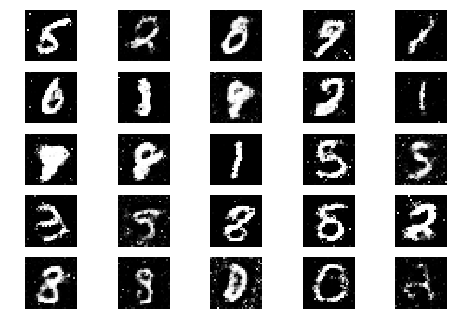

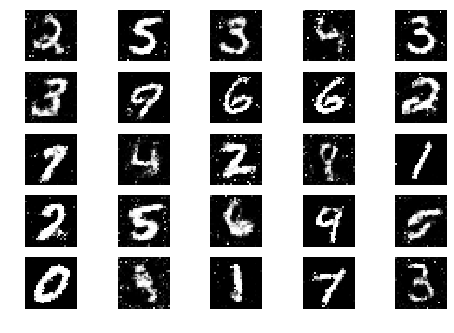

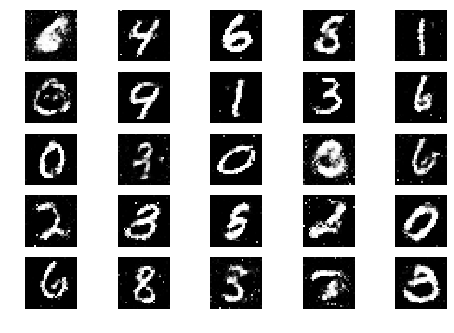

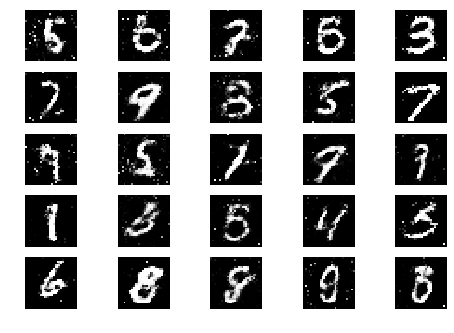

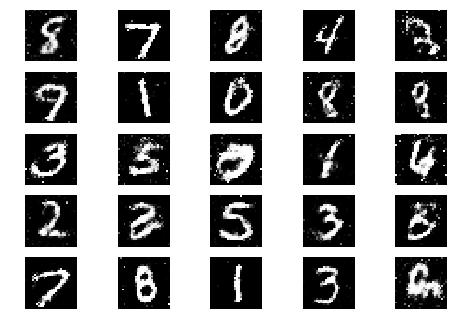

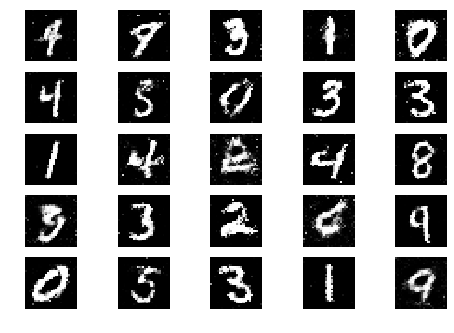

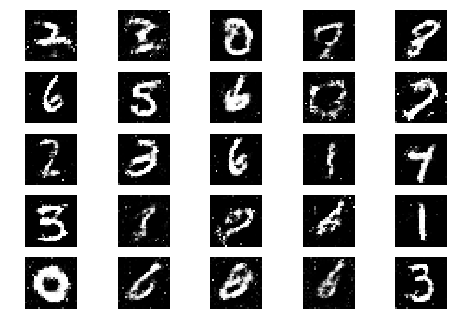

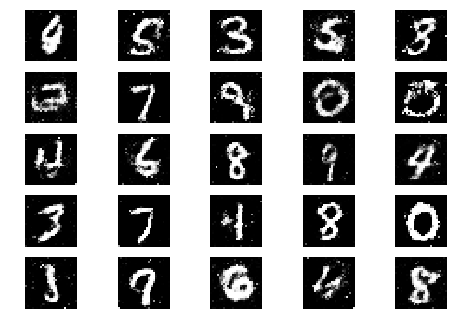

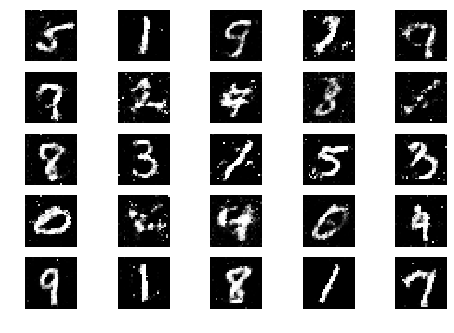

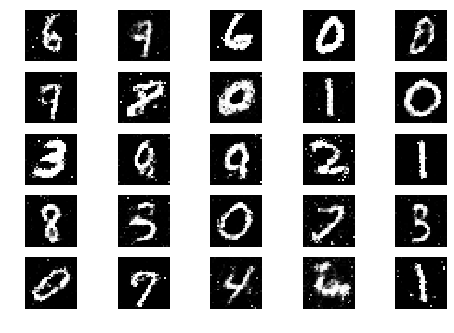

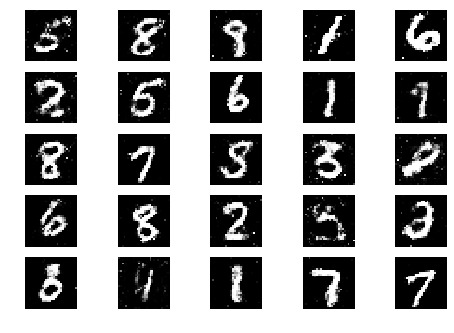

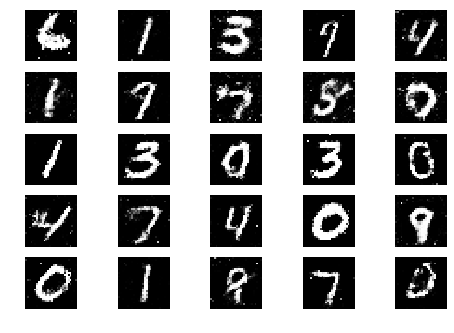

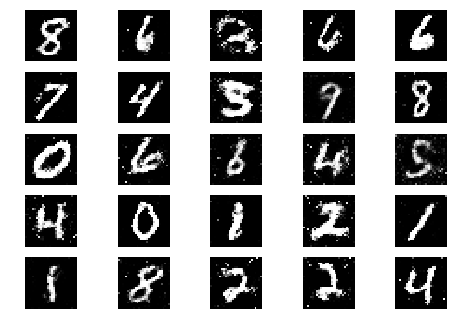

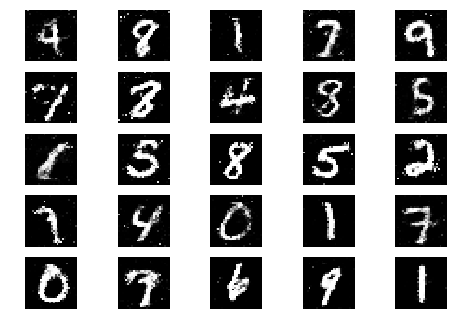

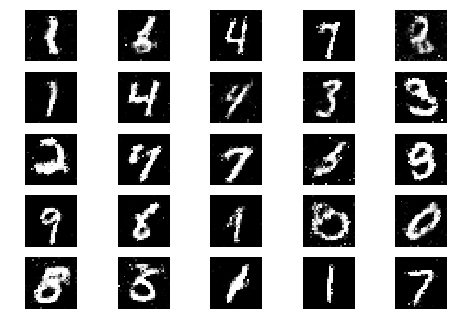

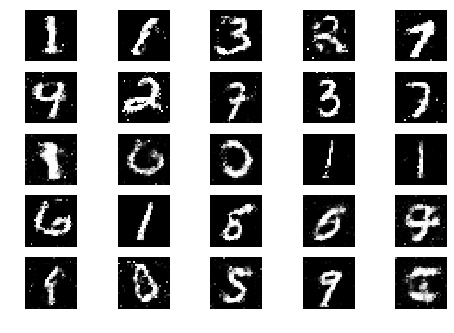

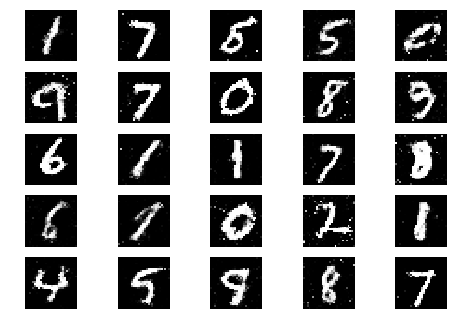

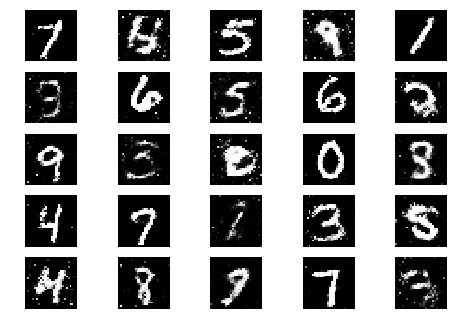

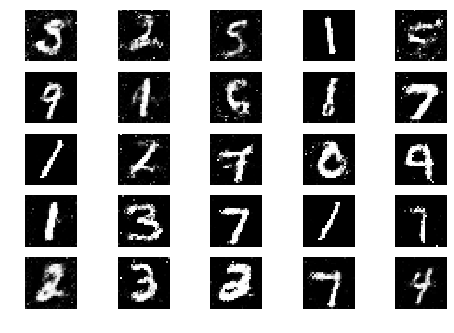

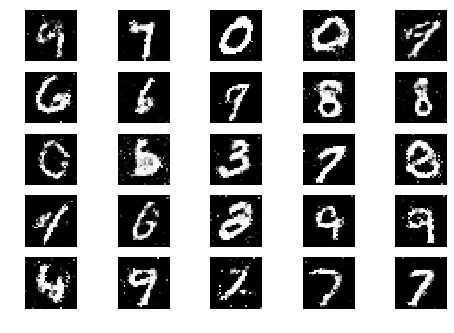

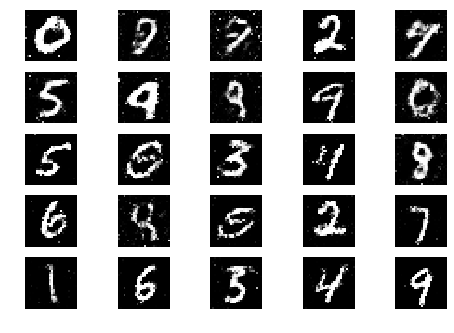

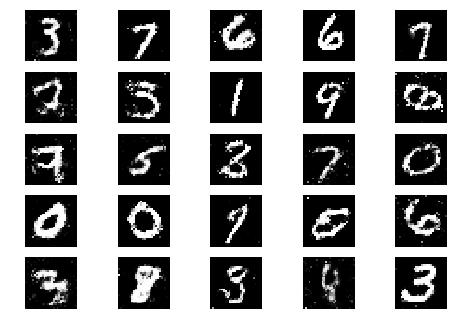

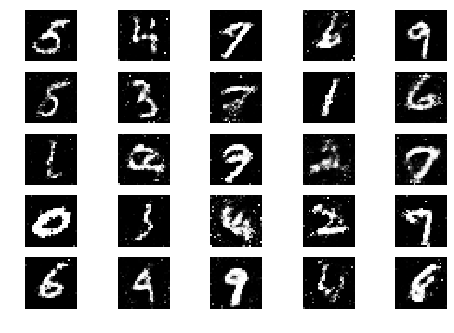

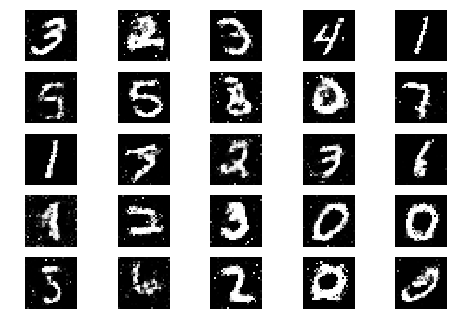

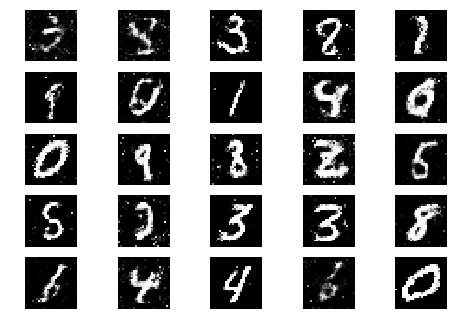

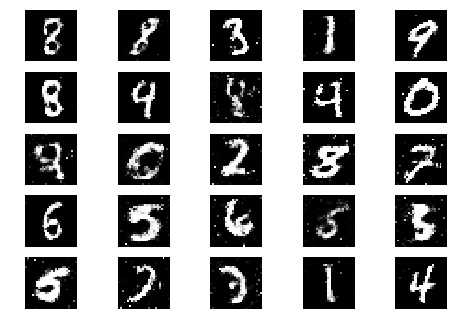

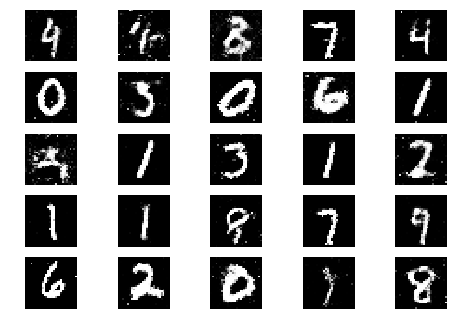

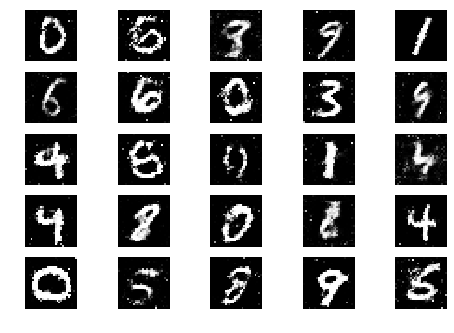

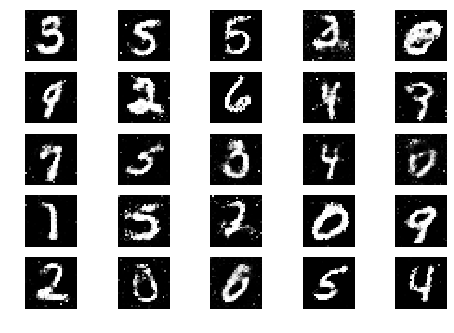

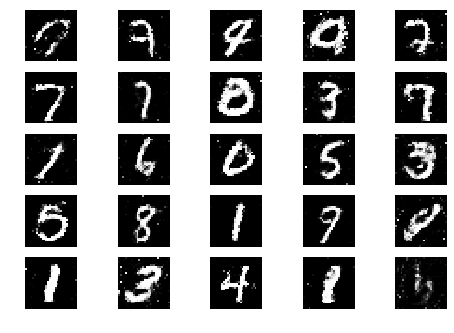

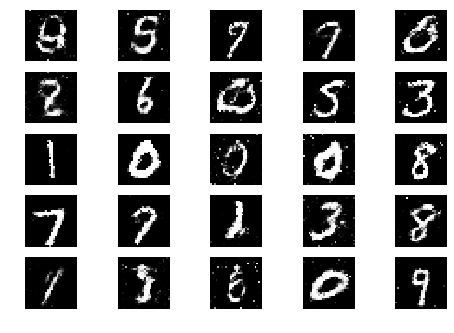

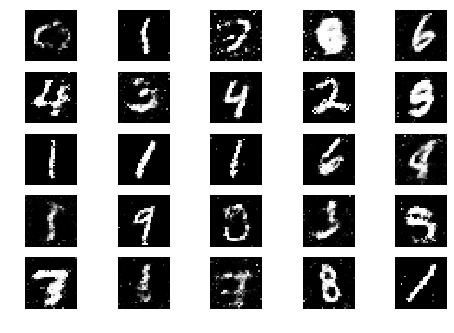

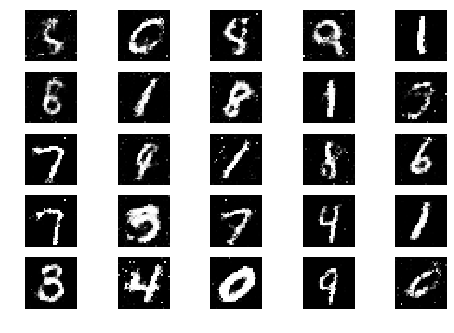

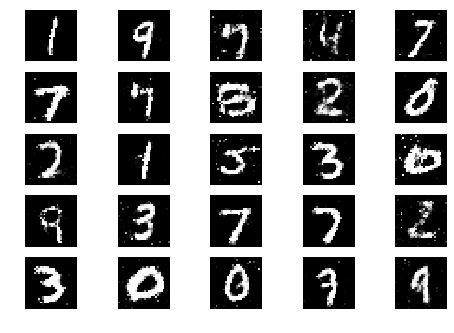

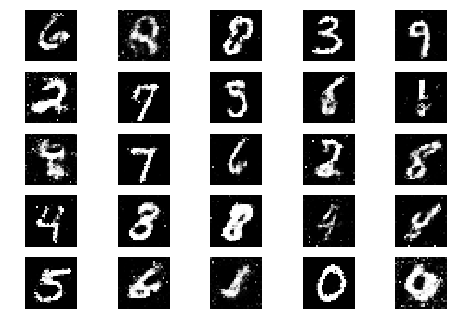

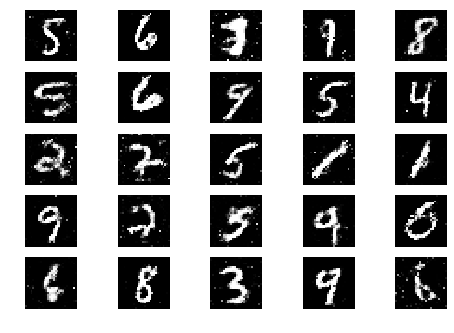

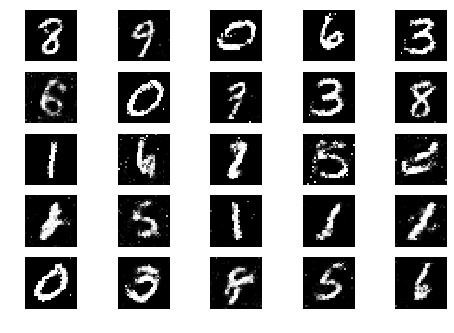

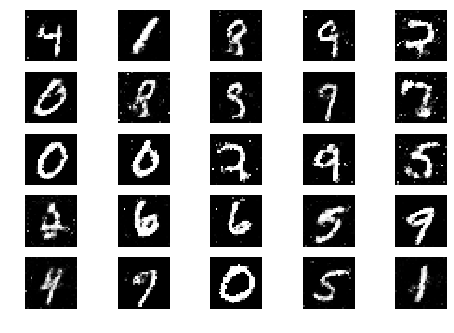

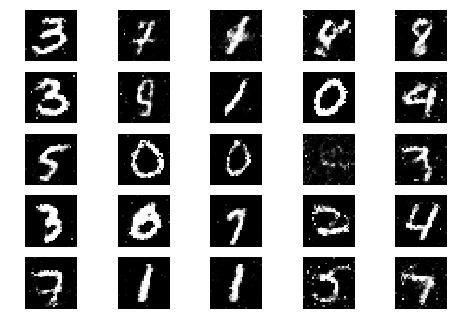

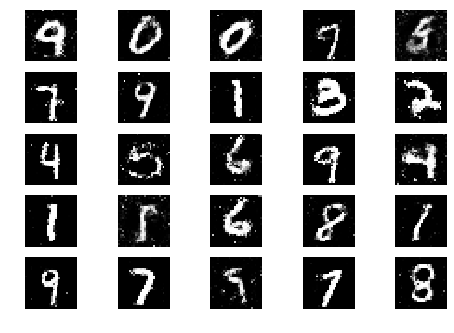

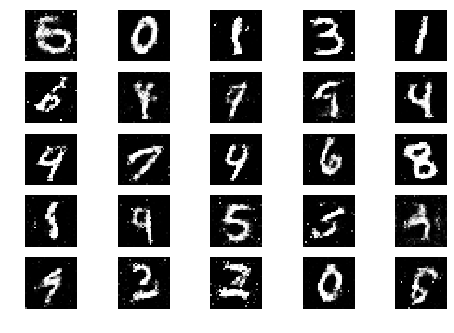

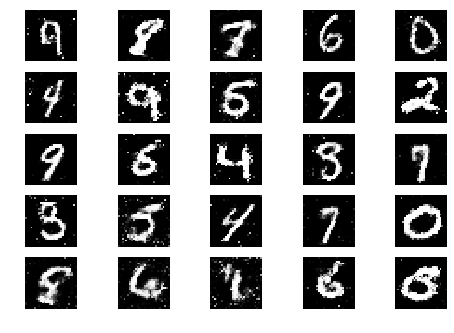

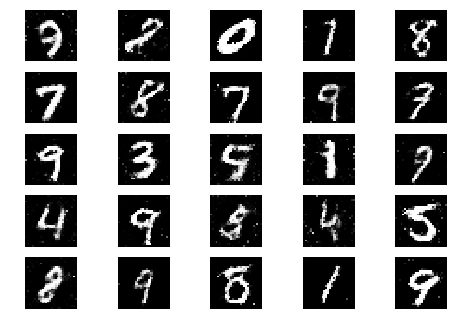

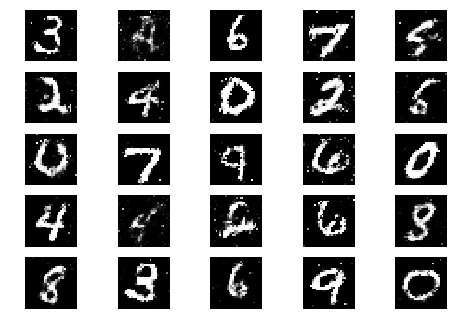

In [11]:
history = gan.fit(
    x_input_train, 
    epochs=30000,
    batch_size=32,
    sample_interval=200
)